# Lasso Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [2]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Przykład
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

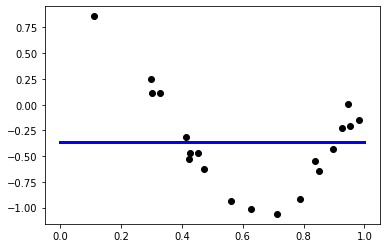

In [3]:
clf = Lasso(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


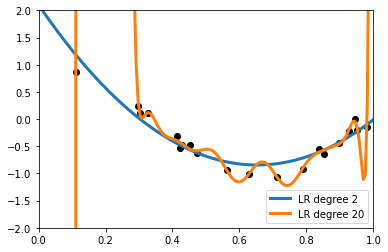

In [4]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (ElasticNet Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001

alpha = 1
alpha = 10000
alpha = 0.0001


C:\Users\jakub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.969e-02, tolerance: 4.324e-04
  model = cd_fast.enet_coordinate_descent(


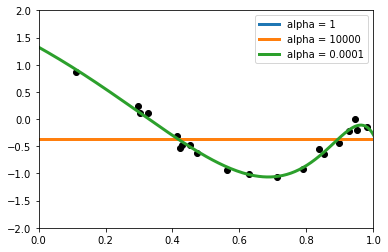

In [6]:
# prepare models
models = []
predicts = []
names=[]

models.append(('alpha = 1', make_pipeline(PolynomialFeatures(20), ElasticNet(alpha=1)) ))
models.append(('alpha = 10000', make_pipeline(PolynomialFeatures(20), ElasticNet(alpha=10000)) ))
models.append(('alpha = 0.0001', make_pipeline(PolynomialFeatures(20), ElasticNet(alpha=0.0001)) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha.

In [7]:
grid = model_selection.GridSearchCV(make_pipeline(PolynomialFeatures(), linear_model.ElasticNet()),
param_grid={
    'polynomialfeatures__degree': [1, 2, 3, 4, 5],
    'elasticnet__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
},
cv = model_selection.KFold(n_splits=5))

grid.fit(x, y)
grid.best_params_

C:\Users\jakub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.344e-03, tolerance: 1.533e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\jakub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.973e-02, tolerance: 4.261e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\jakub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

{'elasticnet__alpha': 0.0001, 'polynomialfeatures__degree': 3}

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [9]:
import pandas as pd
df_adv = pd.read_csv('Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
Y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [10]:
grid = model_selection.GridSearchCV(make_pipeline(PolynomialFeatures(), linear_model.ElasticNet()),
param_grid={
    'polynomialfeatures__degree': [1, 2, 3, 4, 5],
    'elasticnet__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
},
cv = model_selection.KFold(n_splits=5))

grid.fit(X, Y)
grid.best_params_

C:\Users\jakub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.873e+01, tolerance: 4.383e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\jakub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.836e+01, tolerance: 4.218e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\jakub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

{'elasticnet__alpha': 0.1, 'polynomialfeatures__degree': 3}